# Implementing a perceptron learning algorithm in Python

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import Image
import os

### THE COLORS DATASET 

In [2]:
# dataframe
X = np.transpose(np.array([[1, 2, 4, 5, 6, 1, 2, 3, 3, 4], 
                 [2, 1, 2, 3, 1, 4, 5, 4, 6, 5]]))
print(X.shape)
y = np.transpose(np.array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]))
col_df = pd.DataFrame(np.append(X, y, axis = 1), columns=['Red', 'Blue', 'Class'])
col_df

(10, 2)


,Red,Blue,Class
0,1,2,0
1,2,1,0
2,4,2,0
3,5,3,0
4,6,1,0
5,1,4,1
6,2,5,1
7,3,4,1
8,3,6,1
9,4,5,1


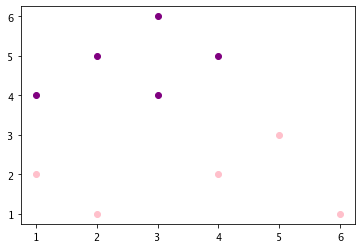

In [3]:
# Plot the dataframe
plt.scatter(X[:5, 0], X[:5, 1], color='pink')
plt.scatter(X[5:, 0], X[5:, 1], color='purple')

plt.show()

In [4]:
# The "true" solution
w_true = np.array([-1., 2.])
b_true = -4

# Net input
z_true = lambda x: np.dot(x, w_true) + b_true

In [5]:
def plot_boundary(w, b, col = 'black'):
    get_x2 = lambda x: -(x * w[0] + b)/w[1] # Here x is one-dimensional
    
    delta = 0.05
    x1 = np.arange(0.0, 8.0, delta)
    
    x2 = get_x2(x1)
    # Plot the dataframe
    plt.scatter(X[:5, 0], X[:5, 1], color='pink', marker = '.')
    plt.scatter(X[5:, 0], X[5:, 1], color='purple', marker = '.')
    # Plot the boundary
    plt.plot(x1, x2, col)
    
    return

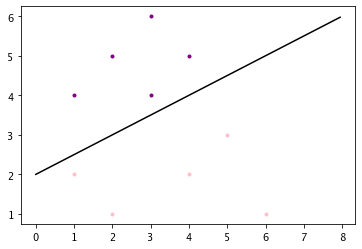

In [6]:
plot_boundary(w_true, b_true)

In [7]:
# We define the updating function
def update_fn(w_old, b_old, Xi, yi, eta):
    # Compute the prediction
    if np.dot(Xi, w_old) + b_old >= 0.0:
        yi_hat = 1
    else:
        yi_hat = 0
    
    # Compute the error
    target = (yi - yi_hat)
    print(yi, yi_hat)
    
    dw1 = eta * target * Xi[0]
    dw2 = eta * target * Xi[1]
    db = eta * target
    
    w1 = w_old[0] + dw1
    w2 = w_old[1] + dw2
    w_new = np.array([w1, w2])
    b_new = b_old + db
    
    return w_new, b_new

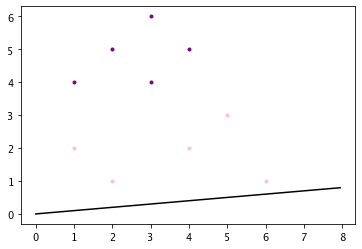

In [8]:
# We initialize the model parameters
w_new = np.array([-0.001, 0.01])
b_new = 0.0

plot_boundary(w_new, b_new)

In [9]:
# We initialize the hyperparameters
eta = 0.01
n_iter = 10

In [10]:
# Run the optimization
for t in range(n_iter):
    print('-------- t = ', t)
    for i in range(X.shape[0]):
        w_new, b_new = update_fn(w_new, b_new, X[i, :], y[i][0], eta)

w_new, b_new

-------- t =  0
0 1
0 0
0 0
0 0
0 0
1 0
1 1
1 1
1 1
1 1
-------- t =  1
0 1
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 1
1 1
-------- t =  2
0 1
0 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  3
0 1
0 0
0 0
0 0
0 0
1 0
1 1
1 1
1 1
1 1
-------- t =  4
0 1
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 1
1 1
-------- t =  5
0 1
0 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  6
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  7
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  8
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  9
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1


(array([-0.021,  0.03 ]), -0.04)

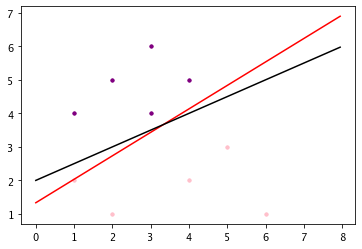

In [11]:
plot_boundary(w_new, b_new, col = 'red')
plot_boundary(w_true, b_true)

In [12]:
-w_new[0]/w_new[1]

0.7000000000000001

In [13]:
-w_true[0]/w_true[1]

0.5

### PART 2

In [14]:
# We add the amount of "white" pigment to the dataset

X = np.concatenate([X, np.transpose([[3, 4, 1, 2, 2, 1, 6, 5, 4, 3]])], axis = 1)
col_df = pd.DataFrame(np.append(X, y, axis = 1), columns=['Red', 'Blue', 'White' ,'Class'])
col_df

,Red,Blue,White,Class
0,1,2,3,0
1,2,1,4,0
2,4,2,1,0
3,5,3,2,0
4,6,1,2,0
5,1,4,1,1
6,2,5,6,1
7,3,4,5,1
8,3,6,4,1
9,4,5,3,1


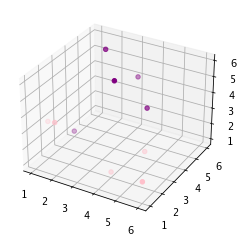

In [15]:
# Plot the dataframe
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:5, 0], X[:5, 1], X[:5, 2], color='pink')
ax.scatter(X[5:, 0], X[5:, 1], X[5:, 2], color='purple')

plt.show()

In [16]:
%matplotlib notebook
def plot_boundary_3d(w, b, col = 'black'):
    get_x3 = lambda x: -(np.dot(x, w[:2]) + b)/w[2] # Here x is 2-dim!
    
    delta = 0.05
    x1range = np.arange(0.0, 8.0, delta)
    x2range = np.arange(0.0, 8.0, delta)
    x1, x2 = np.meshgrid(x1range, x2range, indexing = 'xy')
    Xmesh = np.transpose(np.array([x1, x2]), (1, 2, 0))

    x3 = get_x3(Xmesh)
    # Plot the dataframe
    ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(X[:5, 0], X[:5, 1], X[:5, 2], color='pink')
    ax.scatter(X[5:, 0], X[5:, 1], X[5:, 2], color='purple')

    # Plot the boundary
    ax.plot_surface(x1, x2, x3, color = col, alpha = 0.2)
        
    return

In [17]:
# We define the updating function
def update_fn_3d(w_old, b_old, Xi, yi, eta):
    # Compute the prediction
    if np.dot(Xi, w_old) + b_old >= 0.0:
        yi_hat = 1
    else:
        yi_hat = 0
    
    # Compute the error
    target = (yi - yi_hat)
    print(yi, yi_hat)
    
    dw1 = eta * target * Xi[0]
    dw2 = eta * target * Xi[1]
    dw3 = eta * target * Xi[2] ###### NEW
    db = eta * target
    
    w1 = w_old[0] + dw1
    w2 = w_old[1] + dw2
    w3 = w_old[2] + dw3 ##### NEW
    w_new = np.array([w1, w2, w3]) ##### MODIFIED
    b_new = b_old + db
    
    return w_new, b_new

<IPython.core.display.Javascript object>


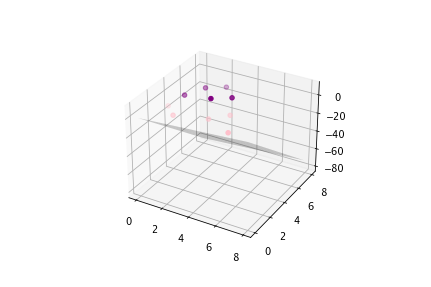

In [27]:
# We initialize the model parameters
w_new = np.array([-0.001, 0.01, 0.001])
b_new = 0.0

plot_boundary_3d(w_new, b_new)

In [28]:
# We initialize the hyperparameters
eta = 0.01
n_iter = 40

In [29]:
tot_iter = 0

In [30]:
# Run the optimization
for t in range(n_iter):
    print('-------- t = ', t)
    for i in range(X.shape[0]):
        w_new, b_new = update_fn_3d(w_new, b_new, X[i, :], y[i][0], eta)
tot_iter += n_iter
print('total iterations = ', tot_iter)
w_new, b_new

-------- t =  0
0 1
0 0
0 0
0 0
0 0
1 0
1 1
1 1
1 1
1 1
-------- t =  1
0 1
0 0
0 0
0 0
0 0
1 0
1 1
1 1
1 1
1 1
-------- t =  2
0 0
0 0
0 1
0 0
0 0
1 1
1 0
1 1
1 1
1 1
-------- t =  3
0 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  4
0 1
0 0
0 0
0 0
0 0
1 1
1 0
1 1
1 1
1 1
-------- t =  5
0 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  6
0 1
0 0
0 0
0 0
0 0
1 1
1 0
1 1
1 1
1 1
-------- t =  7
0 1
0 0
0 0
0 1
0 0
1 1
1 0
1 1
1 1
1 1
-------- t =  8
0 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  9
0 1
0 0
0 0
0 0
0 0
1 1
1 0
1 1
1 1
1 1
-------- t =  10
0 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  11
0 1
0 0
0 0
0 0
0 0
1 1
1 0
1 1
1 1
1 1
-------- t =  12
0 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  13
0 1
0 0
0 0
0 0
0 0
1 1
1 0
1 1
1 1
1 1
-------- t =  14
0 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  15
0 1
0 0
0 0
0 0
0 0
1 1
1 0
1 1
1 1
1 1
-------- t =  16
0 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
-------- t =  17
0 1
0 0
0 0
0 0
0 0
1 1


(array([-0.081,  0.15 , -0.029]), -0.15)

<IPython.core.display.Javascript object>


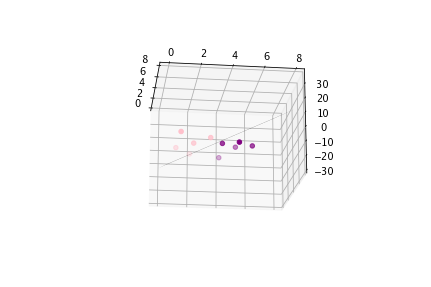

In [31]:
plot_boundary_3d(w_new, b_new)